In [1]:
!git clone https://github.com/PrashantMali07/IIT-Madras-Advanced-Certification-in-Data-Science-and-AI.git

Cloning into 'IIT-Madras-Advanced-Certification-in-Data-Science-and-AI'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 60 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), 11.39 MiB | 9.09 MiB/s, done.


In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [50]:
# loading dataset

# data.csv
data = pd.read_csv("/content/IIT-Madras-Advanced-Certification-in-Data-Science-and-AI/Assignment/Module-Supervised-Learning-Algorithm-In-Python-1/data.csv")

# diabetes.csv
diabetes = pd.read_csv("/content/IIT-Madras-Advanced-Certification-in-Data-Science-and-AI/Assignment/Module-Supervised-Learning-Algorithm-In-Python-1/diabetes.csv")

## Linear Regression

### Problem Statement:

> You work in XYZ Company as a Python Data Scientist. The company officials have collected some data 
on salaries based on year of experience and wish for you to create a model from it.


> **Dataset**:  data.csv

### Tasks to be performed:

* Load the dataset using pandas
* Extract data fromYearsExperience column is a variable named X
* Extract data from salary column is a variable named Y
* Divide the dataset into two parts for training and testing in 66% and 33% proportion
*  Create and train LinearRegression Model on training set
*  Make predictions based on the testing set using the trained model
*  Check the performance by calculating the r2 score of the model

In [4]:
# about dataset

data.info()
print("Mean, Median, percentile... etc, \n", data.describe())
print("\nShape: ",data.shape)
print("\nCorrelation: \n", data.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
Mean, Median, percentile... etc, 
        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Shape:  (30, 2)

Correlation: 
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [5]:
# checking null enteries

data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

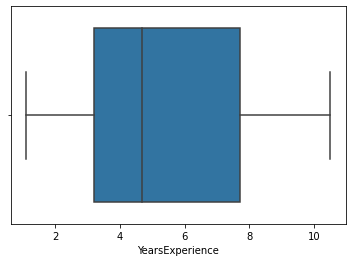

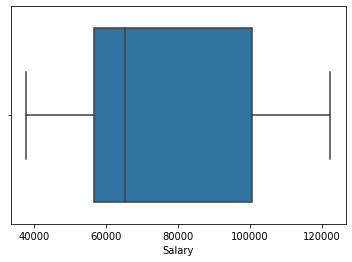

In [6]:
columns = data.columns
for col in columns:
  sns.boxplot(x=col, data = data)
  print()
  plt.show()

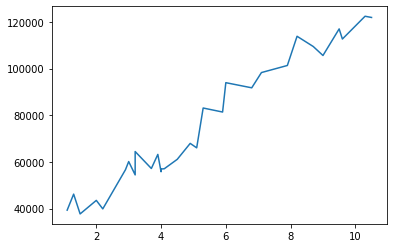

In [7]:
plt.plot(data.YearsExperience, data.Salary)  # Salary will increase as the experience increases.

In [8]:
# assigning dependent and independent variable
X = data['YearsExperience']
X = np.array(X)
X = X.reshape(-1,1)
y = data['Salary']

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

print("Shape of the splitted dataset: ", (Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape))

Shape of the splitted dataset:  ((20, 1), (10, 1), (20,), (10,))


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(Xtrain, ytrain)

linear_reg_pred = linear_reg.predict(Xtest)
r2 = r2_score(ytest, linear_reg_pred)
MSE = mean_squared_error(ytest, linear_reg_pred)
RMSE = np.sqrt(MSE)

print(f"R2 Score: {r2}\nMean Squared Error: {MSE}\nRoot mean squared error: {RMSE}")

R2 Score: 0.9749154407708353
Mean Squared Error: 21026037.329511296
Root mean squared error: 4585.4157204675885


## Logistic Regression

### Problem Statement:

> You work in XYZ Company as a Python Data Scientist. The company officials have collected some data on 
Health parameter based on Diabetes and wish for you to create a model from it. 


> **Dataset**:   diabetes.csv 

### Tasks to be performed:

* Load the dataset using pandas
* Extract data fromOutcome column is a variable named Y 
* Extract data from every column except Outcome column in a variable named X 
* Divide the dataset into two parts for training and testing in 70% and 30% proportion 
* Create and train Logistic Regression Model on training set 
* Make predictions based on the testing set using the trained model 
* Check the performance by calculating the confusion matrix and accuracy score of the model 

In [51]:
# checking required dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


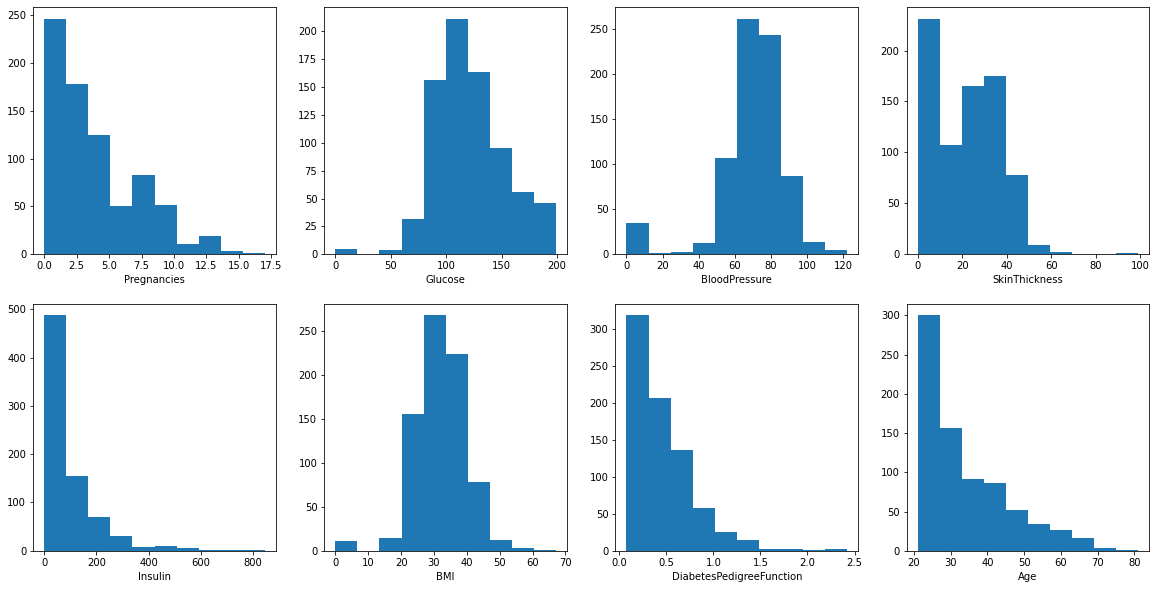

In [52]:
def plot_histograms():
    plt.figure(figsize=(20,10))
    for i,c in enumerate(diabetes.columns):
        if(c != 'Outcome'):
            plt.subplot(2,4, i+1)
            plt.xlabel(c)
            plt.hist(diabetes[c])
            plt.plot()

plot_histograms()

##### Columns gluecose, bloodpressure, bmi, skin thickness and insulin, value of 0 doesn't make sense. That means they represent missing values

In [53]:
#Fill missing values with mean value for normally distributed variables
diabetes['Glucose'].replace(0,round(diabetes['Glucose'].mean()), inplace=True)
diabetes['BloodPressure'].replace(0,round(diabetes['BloodPressure'].mean()), inplace=True)
diabetes['BMI'].replace(0,diabetes['BMI'].mean(), inplace=True)
diabetes['Insulin'].replace(0,round(diabetes['Insulin'].mean()), inplace=True)
diabetes['SkinThickness'].replace(0,round(diabetes['SkinThickness'].mean()), inplace=True)

In [54]:
col_name = diabetes.columns[:-1]
col_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [55]:
def scaling_dataset(X, col):
    sc = StandardScaler()
    X = sc.fit_transform(X)
    X = pd.DataFrame(X, columns= col)
    return X

def metrics(y_test, predict, model):
    cm = confusion_matrix(y_test, predict)
    acc_score = accuracy_score(y_test, predict)
    print(f"Accuracy Score for the {model}: {acc_score*100} \n\nConfusion matrix: \n{cm}")

In [56]:
# splitting dataset into dependent and independent variable

X = scaling_dataset(diabetes.iloc[:,:-1], col_name)
y = diabetes.iloc[:,-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865254,-0.020645,0.865416,-0.416845,0.167255,0.468492,1.425995
1,-0.844885,-1.206013,-0.516132,0.236519,-0.416845,-0.851535,-0.365061,-0.190672
2,1.233880,2.015957,-0.681294,-0.602010,-0.416845,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074504,-0.516132,-0.392378,-0.266273,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503604,-2.663240,0.865416,0.529606,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679977,0.309679,2.228025,0.658667,0.065376,-0.908682,2.532136
764,-0.547919,0.010445,-0.185807,0.026886,-0.416845,0.632988,-0.398282,-0.531023
765,0.342981,-0.022432,-0.020645,-0.392378,-0.072681,-0.909751,-0.685193,-0.275760
766,-0.844885,0.141954,-1.011618,-0.602010,-0.416845,-0.342140,-0.371101,1.170732


In [57]:
# splitting dataset into train & test and ratio of it 70:30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Shape of the splitted dataset: ", (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Shape of the splitted dataset:  ((537, 8), (231, 8), (537,), (231,))


In [59]:
# fitting Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)

# calling function for the confusion matrix & accuracy score
metrics(y_test, log_reg_predict, 'Logistic Regression Model')

Accuracy Score for the Logistic Regression Model: 77.05627705627705 

Confusion matrix: 
[[140  17]
 [ 36  38]]


## Random Forest 

### Problem Statement:

> You work in XYZ Company as a Python Data Scientist. The company officials have collected some data 
on salaries based on year of experience and wish for you to create a model from it. 


> Dataset:   diabetes.csv 

### Tasks to be performed:

* Load the dataset using pandas 
* Extract data fromOutcome column is a variable named Y 
* Extract data from every column except Outcome column in a variable named X.
* Divide the dataset into two parts for training and testing in 70% and 30% proportion 
* Create and train Random Forest Model on training set 
* Make predictions based on the testing set using the trained model 
* Check the performance by calculating the confusion matrix and accuracy score of the model 

In [71]:
# fitting Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(X_train, y_train)

rf_predict = rf.predict(X_test)

# calling function for the confusion matrix & accuracy score
metrics(y_test, rf_predict, 'Random Forest Classifier Model')

Accuracy Score for the Random Forest Classifier Model: 77.48917748917748 

Confusion matrix: 
[[143  14]
 [ 38  36]]


## Decision Tree Classifier


### Problem Statement:

> You work in XYZ Company as a Python Data Scientist. The company officials have collected some data 
on salaries based on year of experience and wish for you to create a model from it.


> Dataset:  diabetes.csv 

### Tasks to be performed:

* Load the dataset using pandas 
* Extract data fromOutcome column is a variable named Y 
* Extract data from every column except Outcome column in a variable named X
* Divide the dataset into two parts for training and testing in 70% and 30% proportion 
* Create and train Decision Tree Model on training set 
* Make predictions based on the testing set using the trained model 
* Check the performance by calculating the confusion matrix and accuracy score of the model 

In [78]:
# fitting Decision Tree Classifier Model
dtc = DecisionTreeClassifier(random_state=456, criterion='gini')
dtc.fit(X_train, y_train)

dtc_predict = dtc.predict(X_test)

# calling function for the confusion matrix & accuracy score
metrics(y_test, dtc_predict, 'Decision Tree Classifier Model')

Accuracy Score for the Decision Tree Classifier Model: 75.75757575757575 

Confusion matrix: 
[[127  30]
 [ 26  48]]


## Naïve-Bayes


### Problem Statement:

> You work in XYZ Company as a Python Data Scientist. The company officials have collected some data 
on salaries based on year of experience and wish for you to create a model from it. 


> Dataset:  diabetes.csv 

### Tasks to be performed:

* Load the dataset using pandas 
* Extract data fromOutcome column is a variable named Y 
* Extract data from every column except Outcome column in a variable named X
* Divide the dataset into two parts for training and testing in 70% and 30% proportion 
* Create and train Naïve Bayes Model on training set 
* Make predictions based on the testing set using the trained model 
* Check the performance by calculating the confusion matrix and accuracy score of the model

In [81]:
# fitting Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_predict = nb.predict(X_test)

# calling function for the confusion matrix & accuracy score
metrics(y_test, nb_predict, 'Naive Bayes Model')

Accuracy Score for the Naive Bayes Model: 74.89177489177489 

Confusion matrix: 
[[136  21]
 [ 37  37]]
